# Double pendulum using Lagrange's equation

Defines a DoublePendulum class that is used to generate basic pendulum plots from solving Lagrange's equations. A double pendulum is one pendulum attached to another. This notebook answers parts a, b and c of the problem.

* Last revised 29-April-2022 by Kathy Duray (duray.5@osu.edu).

## Euler-Lagrange equations

The Legrangian method requires generalized coordinates. For a double pendulum, generalized coordinate will be $\theta_1$ and $\theta_2$, which are the angles the pendulums' string makes with the vertical. The positions and velocities of each pendulum bob can be written in terms of these generalized coordinates:

$$\begin{align}
    x_1 &= L_1 \sin\theta_1 \;, & \dot{x}_1 &= L_1 \dot{\theta}_1 \cos\theta_1  \\
    y_1 &= L_1 \cos\theta_1 \;, & \dot{y}_1 &= -L_1 \dot{\theta}_1 \sin\theta_1  \\
    x_2 &= x_1 + L_2 \sin\theta_2 \;, & \dot{x}_2 &= L_1 \dot{\theta}_1 \cos\theta_1 + L_2 \dot{theta}_2 \cos\theta_2 \\
    y_2 &= y_1 + L_2 \cos\theta_2 \;, & \dot{y}_1 &= -L_1 \dot{\theta}_1 \sin\theta_1 - L_2 \dot{theta}_2 \sin\theta_2 \\
\end{align}$$

From these we can calculate the kinetic and potential energies:
$$\begin{align}
T &= \frac{1}{2} m_1 L_1^2 \dot{\theta}_1 ^2 + \frac{1}{2} m_2 [L_1^2 \dot{\theta}_1 ^2 + L_2^2 \dot{\theta}_2 ^2 + 2 L_1 \dot{\theta}_1 L_2 \dot{\theta}_2 \cos(\theta_1 - \theta_2)] \\
U &= -(m_1 + m_2) g L_1 \cos\theta_1- m_2 g L_2 \cos\theta_2
\end{align}$$

The Lagrangian is simply $\mathcal{L} = T - U$. The Euler-Lagrange equations are calculated from

$$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot q_i} = \frac{\partial\mathcal L}{\partial q_i}
\end{align}$$

where $q_i$ is either $\theta_1$ or $\theta_2$ The corresponding equations are:

$$\begin{align}
\ddot{\theta}_1 &= \frac{\cos(\theta_1 - \theta_2)[m_2 g \sin\theta_2 - L_1 \dot{\theta}_1^2 m_1 \sin(\theta_1 - \theta_2)] + L_2 \dot{\theta}_2^2 m_2 \sin(\theta_1 - \theta_2) - (m_1 + m_2) g \sin\theta_1}{L_1 m_1 + L_1 m_2 \sin(\theta_1 - \theta_2)^2} \\
\ddot{\theta}_2 &= \frac{\cos(\theta_1 - \theta_2)[(m_1 + m_2) g \sin\theta_1 + m_2 L_2 \dot{\theta}_2^2 \sin(\theta_1 - \theta_2)] + (m_1 + m_2)[L_1 \dot{\theta}_1^2 \sin(\theta_1 - \theta_2) - g \sin\theta_1]}{L_2 m_1 + L_2 m_2 \sin(\theta_1 - \theta_2)^2}
\end{align}$$

The ODE solver **integrate.solve_ivp** solves systmes of first order differential equations, so we will define:

$$\begin{align}
    z_1 &= \dot{\theta}_1 \;, & \dot{z}_1 &= \ddot{\theta}_1  \\
    z_2 &= \dot{\theta}_2 \;, & \dot{z}_2 &= \ddot{\theta}_2  \\
\end{align}$$

$\dot{z}_1$ and $\dot{z}_2$ are the equations I will code in my **dy_dt** function. 

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [4]:
class DoublePendulum():
    """
    Double Pendulum class implements the parameters and Lagrange's equations for 
     a double pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of pendulum 1
    L2 : float
        length of pendulum 2
    g : float
        gravitational acceleration at the earth's surface
    mass1 : float
        mass of pendulum 1
    mass2 : float
        mass of pendulum 2

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., mass1=1., mass2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.mass1 = mass1
        self.mass2 = mass2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dtheta/dt d^2theta/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = theta1(t) and y[1] = d_theta1 = z1
                                      y[2] = theta2(t) and y[3] = d_theta2 = z2
            
        Returns
        -------
        
        """
        theta1, z1, theta2, z2 = y
        
        cos = np.cos(theta1 - theta2)
        sin = np.sin(theta1 - theta2)
        
        d_theta1 = z1
        d_z1 = ( cos * (self.mass2 * self.g * np.sin(theta2) - self.L1 * z1**2 * self.mass2 * sin) \
                - self.L2 * z2**2 * self.mass2 * sin \
                - (self.mass1 + self.mass2) * self.g * np.sin(theta1) ) \
                / (  self.L1 * self.mass1 + self.L1 * self.mass2 * sin**2 )

        
        d_theta2 = z2
        d_z2 = ( cos * ((self.mass1 + self.mass2) * self.g * np.sin(theta1) + self.mass2 * self.L2 * z2**2 * sin) \
                + (self.mass1 + self.mass2) * (self.L1 * z1**2 * sin - self.g * np.sin(theta2)) ) \
                / (  self.L2 * self.mass1 + self.L2 * self.mass2 * sin**2 )
        
        return [ d_theta1, d_z1, d_theta2, d_z2 ]
    
    def solve_ode(self, t_pts, theta1_0, d_theta1_0, theta2_0, d_theta2_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, d_theta1_0, theta2_0, d_theta2_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta1_0, d_theta1_0, theta2_0, d_theta2_0 = solution.y

        return theta1_0, d_theta1_0, theta2_0, d_theta2_0
    
    def energy(y):
        
        """Return the energy of the system"""
        
        theta1, theta1d, theta2, theta2d = y.T
        
        #potential energy
        U = -(mass1+mass2)*L1*g*np.cos(theta1) - mass2*L2*g*np.cos(theta2)
        
        #kinetic energy (split into 2 parts so i know what's what)
        m1 = 0.5*mass1*(L1*theta1d)**2
        m2 = 0.5*mass2((L1*theta1d)**2 + (L2*theta2d)**2 + 2*L1*L2*theta1d*theta2d*np.cos(theta1-theta2))
        T = m1 + m2
        return T + U
      

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Part a) Make simple pendulum plots 

In [7]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')
theta_dot_vs_time_labels = (r'$t$', r'$d\theta/dt(t)$')
state_space_labels = (r'$\theta$', r'$d\theta/dt$')

# Pick times to plot over (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
mass1 = 1.
mass2 = 1.

# Instantiate the double pendulum!!!! 
dp1 = DoublePendulum(L1=L1, L2=L2, g=g, mass1=mass1, mass2=mass2)

(<AxesSubplot:xlabel='$t$', ylabel='$\\theta(t)$'>,
 <matplotlib.lines.Line2D at 0x1d3039433d0>)

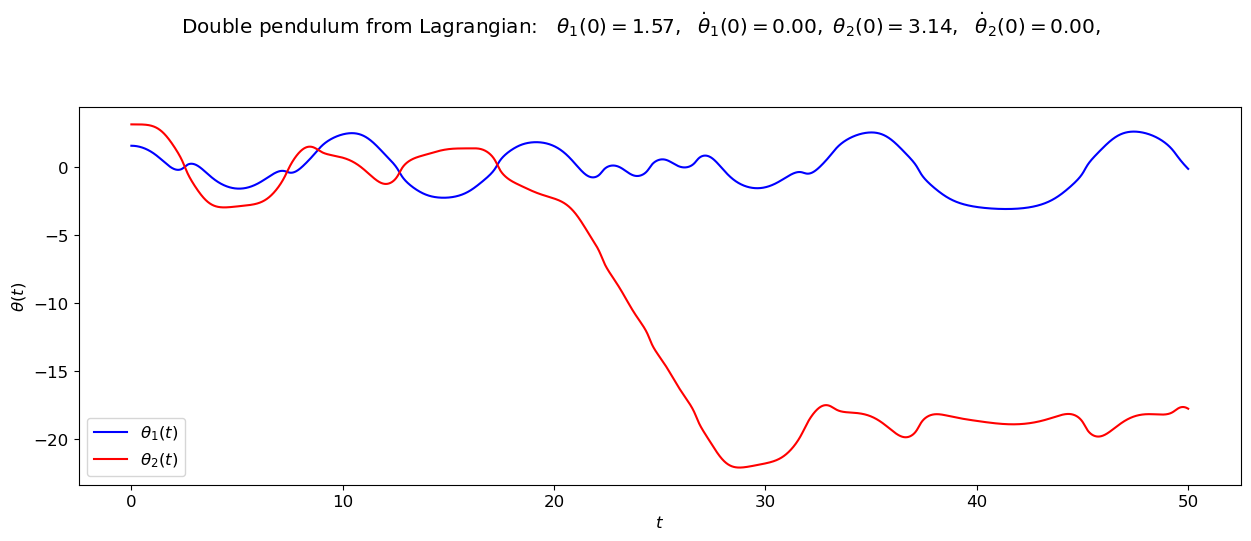

In [8]:
# pendulums have different initial conditions
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, d_theta1, theta2, d_theta2 = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0)= {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0)= {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            ax=ax_a)    

And now I will do the produce the same plot but with different initial conditions. This will test to see if the pendulum still moves as expected. 

(<AxesSubplot:xlabel='$t$', ylabel='$\\theta(t)$'>,
 <matplotlib.lines.Line2D at 0x1d30536f310>)

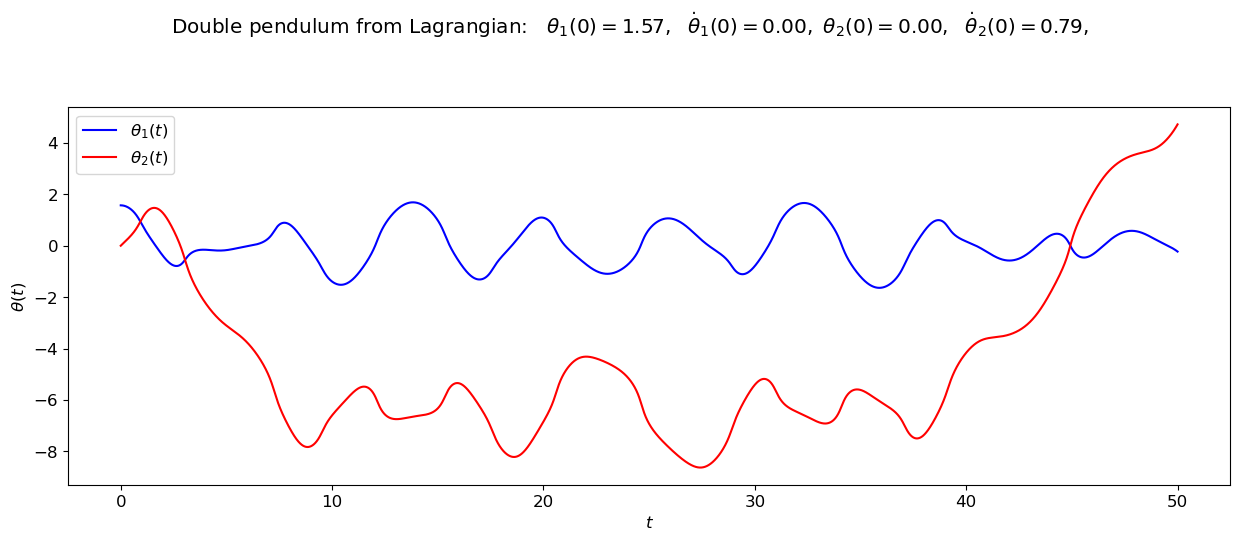

In [9]:
# pendulums have different initial conditions
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = 0.
theta2_dot_0 = np.pi/4

theta1, d_theta1, theta2, d_theta2 = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0)= {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0)= {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            ax=ax_a)    

For fun, I will make one last plot but with the same initial conditions for both bobs. 

(<AxesSubplot:xlabel='$t$', ylabel='$\\theta(t)$'>,
 <matplotlib.lines.Line2D at 0x1d304d39c70>)

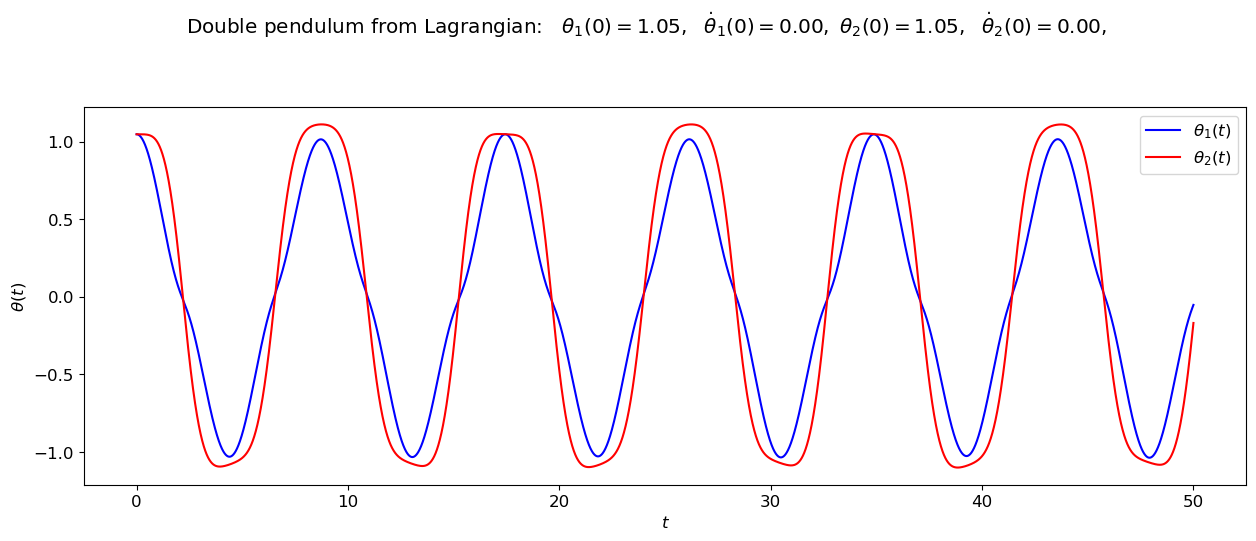

In [10]:
# pendulums have the same initial conditions
theta1_0 = np.pi/3
theta1_dot_0 = 0.
theta2_0 = np.pi/3
theta2_dot_0 = 0.

theta1, d_theta1, theta2, d_theta2 = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0)= {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0)= {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            ax=ax_a)    

## Part b) Testing for chaos

To do this, I will use the same initial conditions I used in my 3 cases for part a, but now $\theta_2$ is offset by an amount of 0.00001 

(1e-08, 2)

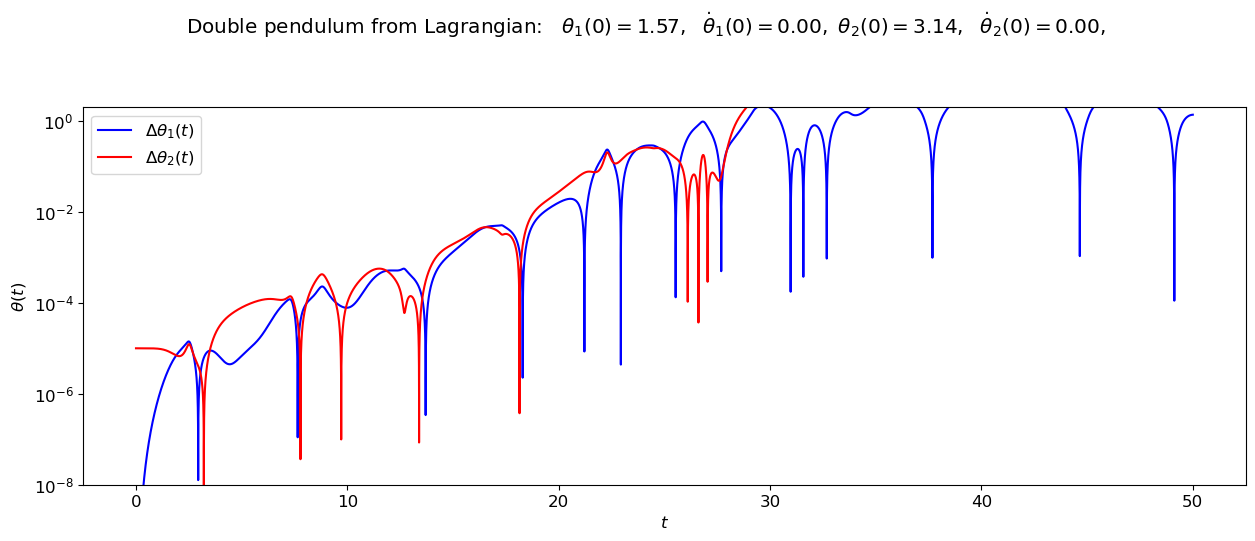

In [11]:
# pendulums have different initial conditions
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

# making two pendulums with the same initial conditions, but pendulum 2 is now a little bit off
theta1, d_theta1, theta2, d_theta2 = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
theta1b, d_theta1b, theta2b, d_theta2b = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0-0.00001, theta2_dot_0)

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0)= {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0)= {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
#creating our plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start : stop] - theta1b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            semilogy = True,
            label=r'$\Delta\theta_1(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start : stop] - theta2b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='red',
            semilogy = True,
            label=r'$\Delta\theta_2(t)$', 
            ax=ax_a)

ax_a.set_ylim(10**(-8), 2)

Again, we will test with different inital conditions. 

(1e-12, 0.01)

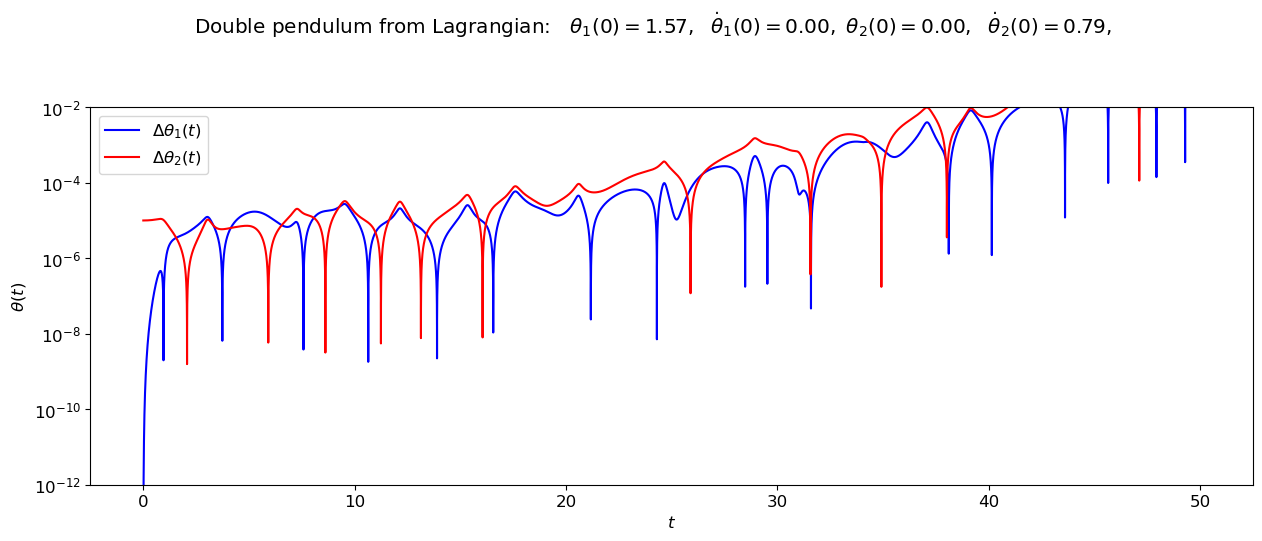

In [12]:
# pendulums have different initial conditions
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = 0.
theta2_dot_0 = np.pi/4

# making two pendulums with the same initial conditions, but pendulum 2 is now a little bit off
theta1, d_theta1, theta2, d_theta2 = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
theta1b, d_theta1b, theta2b, d_theta2b = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0-0.00001, theta2_dot_0)

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0)= {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0)= {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
     
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start : stop] - theta1b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            semilogy = True,
            label=r'$\Delta\theta_1(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start : stop] - theta2b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='red',
            semilogy = True,
            label=r'$\Delta\theta_2(t)$', 
            ax=ax_a)

ax_a.set_ylim(10**(-12), 10**(-2))

And finally, we see chaos when the bobs have the same initial conditions

(1e-12, 0.01)

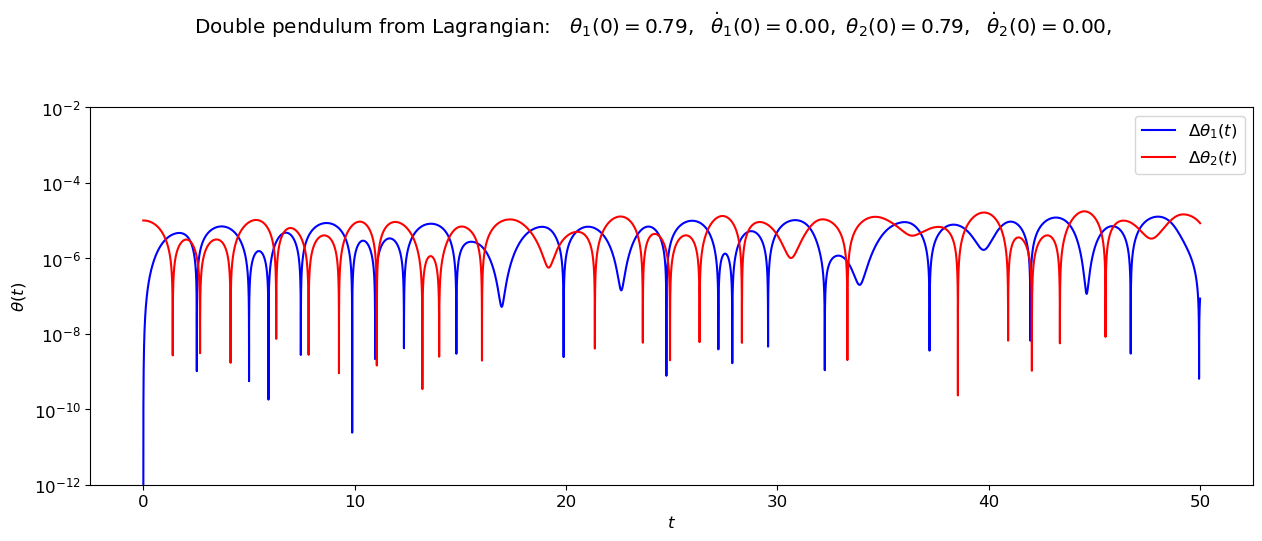

In [13]:
# pendulums have the same initial conditions
theta1_0 = np.pi/4
theta1_dot_0 = 0.
theta2_0 = np.pi/4
theta2_dot_0 = 0.

# making two pendulums with the same initial conditions, but pendulum 2 is now a little bit off
theta1, d_theta1, theta2, d_theta2 = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
theta1b, d_theta1b, theta2b, d_theta2b = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0-0.00001, theta2_dot_0)

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0)= {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0)= {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
     
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start : stop] - theta1b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            semilogy = True,
            label=r'$\Delta\theta_1(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start : stop] - theta2b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='red',
            semilogy = True,
            label=r'$\Delta\theta_2(t)$', 
            ax=ax_a)

ax_a.set_ylim(10**(-12), 10**(-2))

So the above 3 plots demonstrate chaos due to setting the initial conditions beyond the small angle approximation. 